Data loaded successfully!
Shape: (283, 8)

Columns: ['SampleID', 'Time', 'Biomass (g/L)', 'OD600 (N/A)', 'Psilocin g/L', 'Psilocybin g/L', 'Baeocystine g/L', 'Tryptamine g/L']

First few rows:
                SampleID       Time  Biomass (g/L)  OD600 (N/A)  Psilocin g/L  \
0   27-PSI_F503_C1_R1_T6  46.541389       12.17760         29.5      0.001568   
1   27-PSI_F503_C1_R1_T7  50.061667       12.38400         30.0      0.006422   
2   27-PSI_F503_C1_R1_T8  52.987778       17.00736         41.2      0.009436   
3   27-PSI_F503_C1_R1_T9  69.941944       31.45536         76.2      0.031261   
4  27-PSI_F503_C1_R1_T10  73.482222       39.79392         96.4      0.027627   

   Psilocybin g/L  Baeocystine g/L  Tryptamine g/L  
0        0.003618         0.000071        0.000706  
1        0.009526         0.000204        0.001889  
2        0.012903         0.000265        0.001894  
3        0.038406         0.000590        0.001044  
4        0.061605         0.000723        0.000885  

S

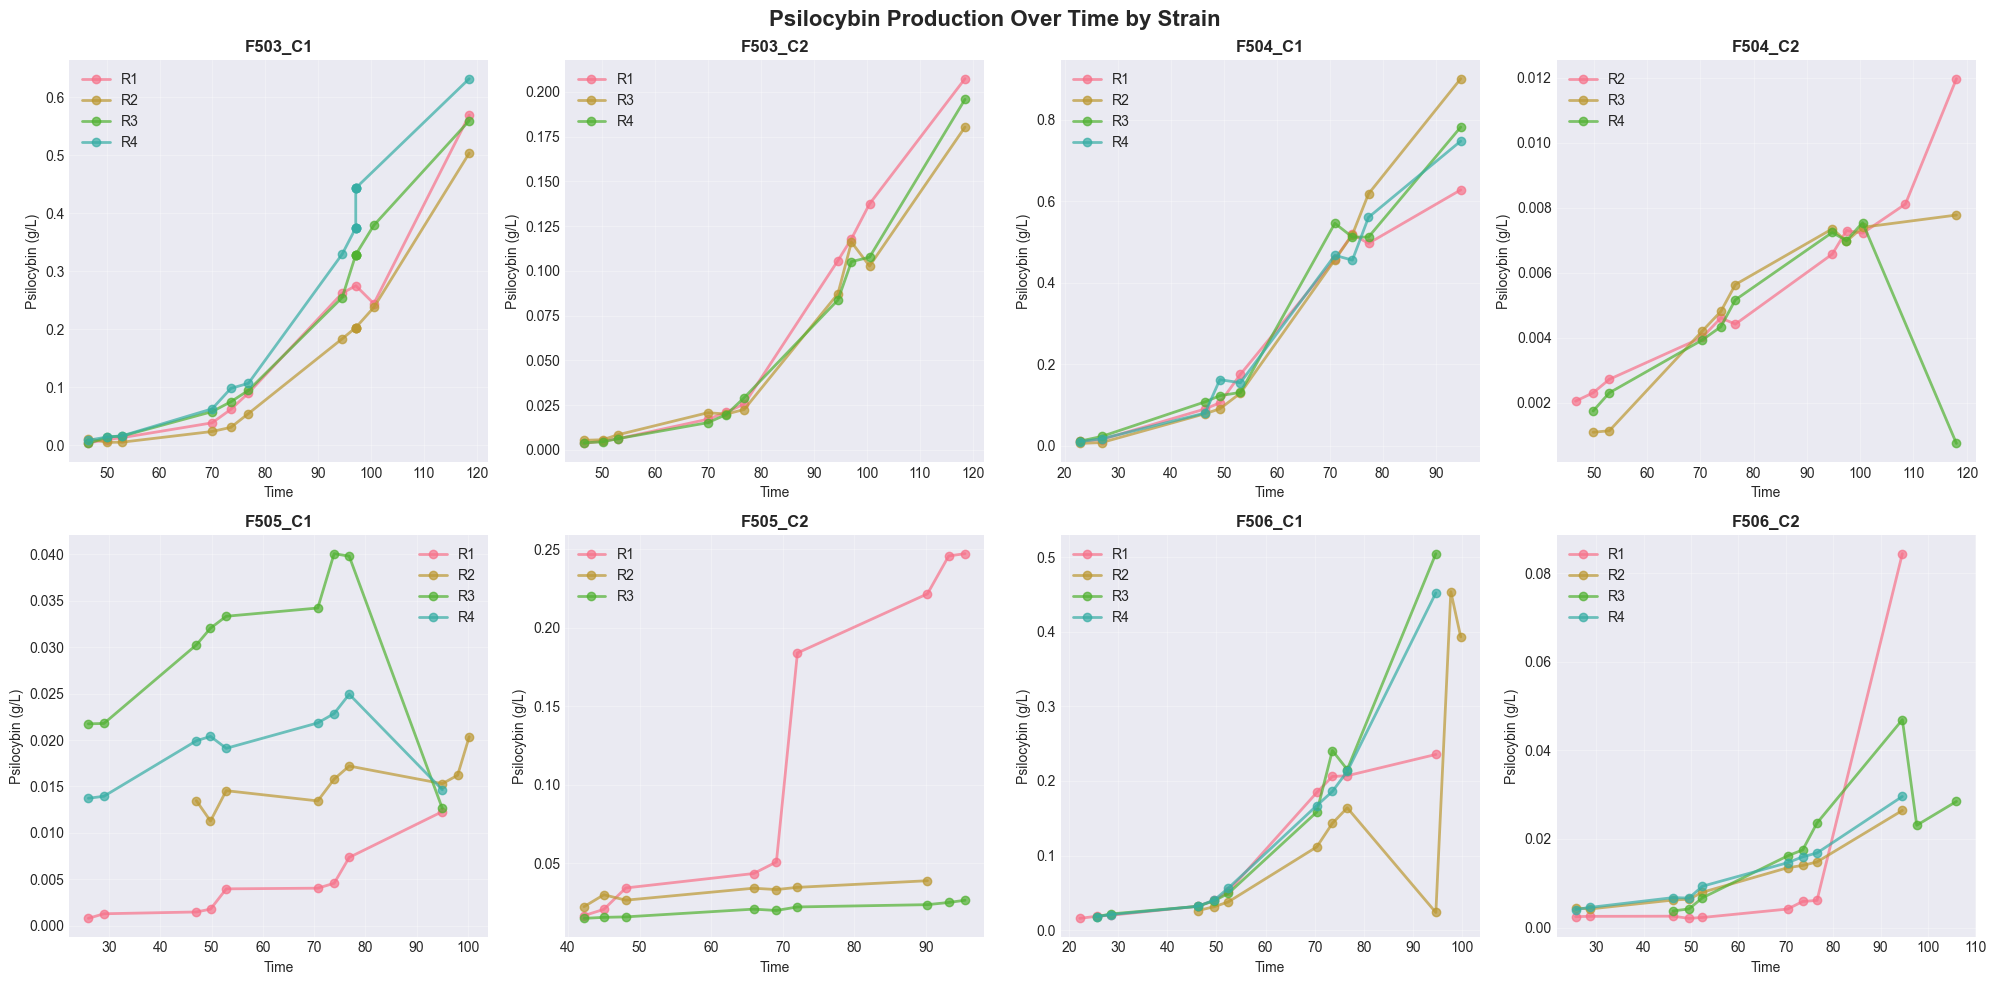


Psilocybin Production Summary by Strain:
          Mean    Std    Max    Min
Strain                             
F504_C1  0.297  0.269  0.901  0.006
F503_C1  0.206  0.182  0.632  0.003
F506_C1  0.131  0.137  0.505  0.016
F505_C2  0.059  0.075  0.247  0.015
F503_C2  0.060  0.064  0.207  0.004
F506_C2  0.014  0.016  0.084  0.002
F505_C1  0.017  0.011  0.040  0.001
F504_C2  0.005  0.003  0.012  0.001


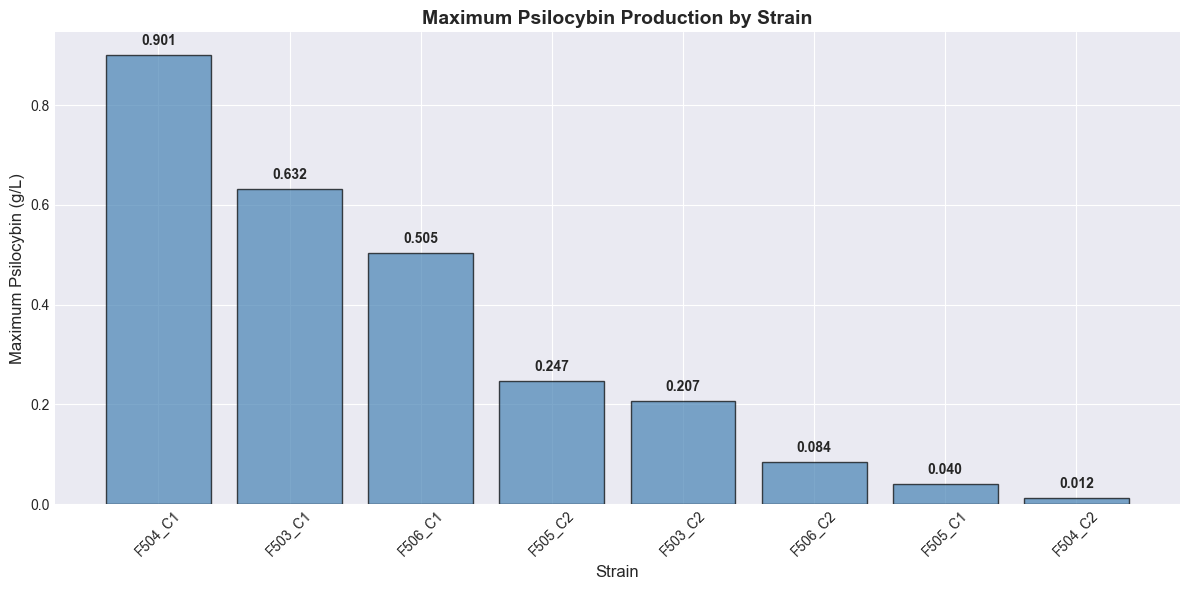

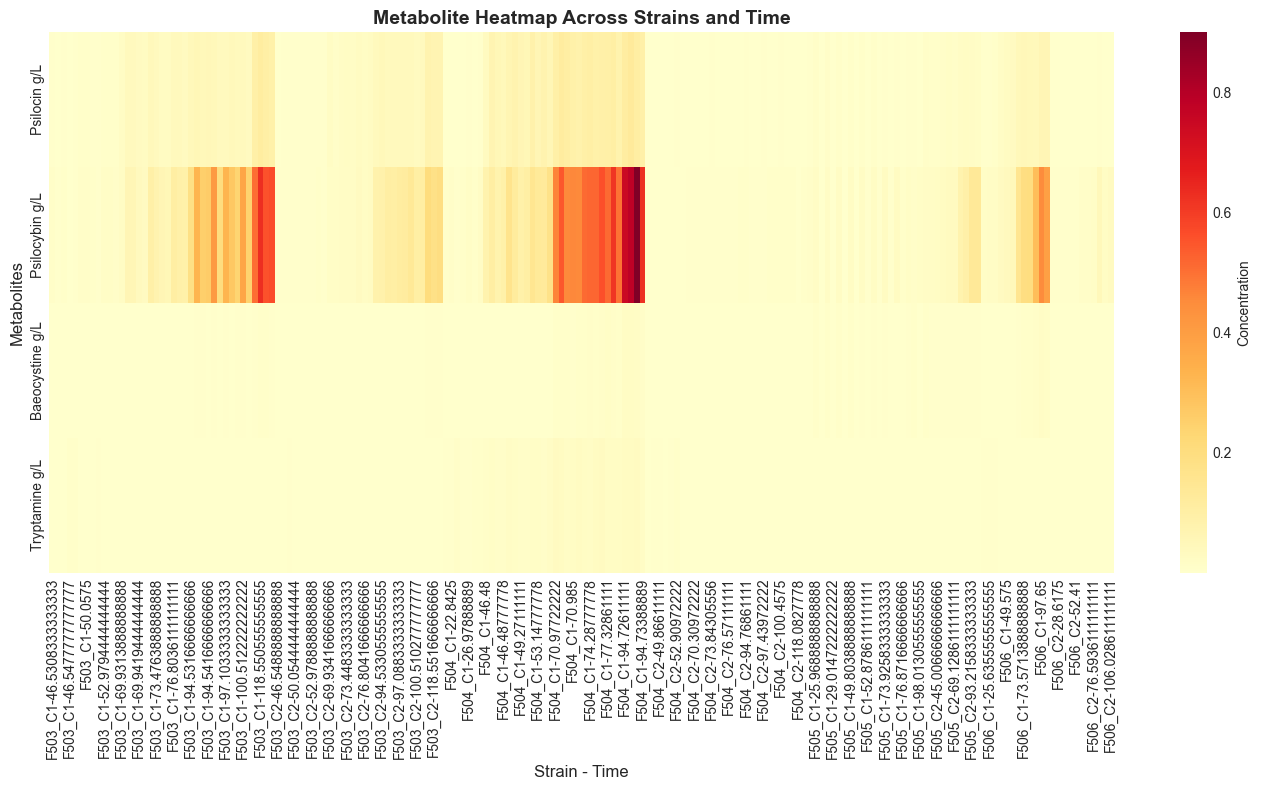

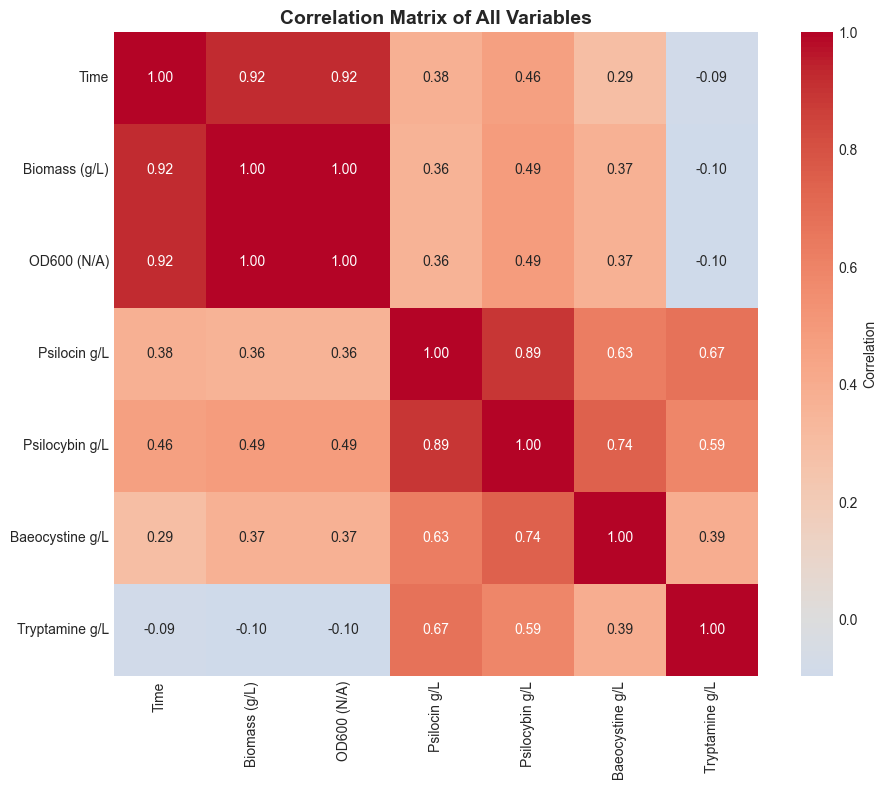


Top correlations with Psilocybin:
Psilocybin g/L     1.000000
Psilocin g/L       0.890559
Baeocystine g/L    0.744627
Tryptamine g/L     0.593166
Biomass (g/L)      0.489092
OD600 (N/A)        0.489069
Time               0.463861
Name: Psilocybin g/L, dtype: float64

SECTION 2: RANDOM FOREST FEATURE IMPORTANCE
⚠️ Dropping 2 rows with missing Psilocybin g/L values.

Features used: ['Time', 'Biomass (g/L)', 'OD600 (N/A)', 'Psilocin g/L', 'Baeocystine g/L', 'Tryptamine g/L']
Samples: 281

Random Forest Performance:
Mean RMSE (5-fold CV): 0.0632 (+/- 0.0289)
R² Score on full data: 0.9942

Feature Importance Ranking:
           Feature  Importance
3     Psilocin g/L    0.818814
4  Baeocystine g/L    0.121157
0             Time    0.027223
5   Tryptamine g/L    0.020425
1    Biomass (g/L)    0.006376
2      OD600 (N/A)    0.006006


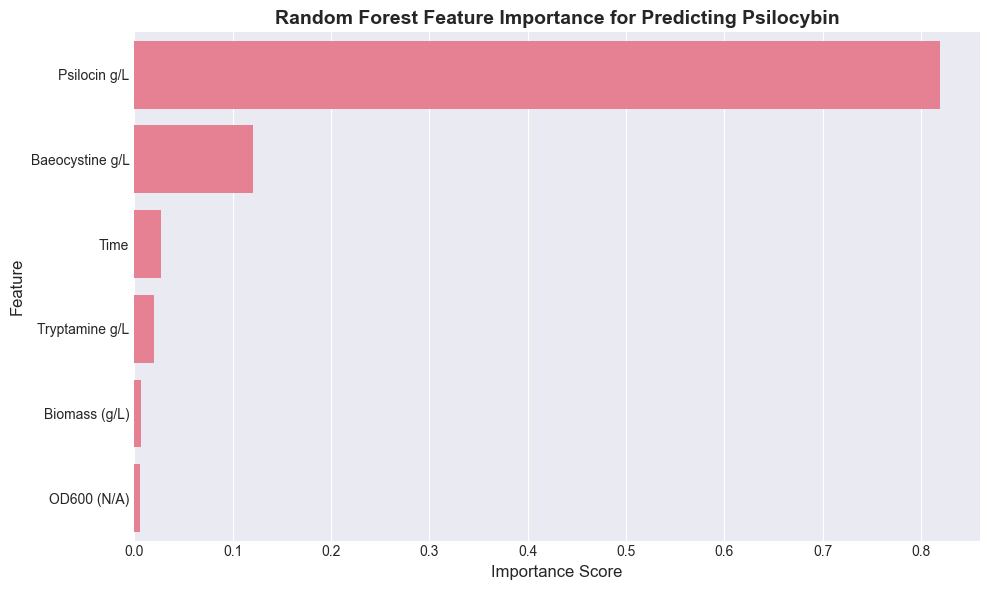

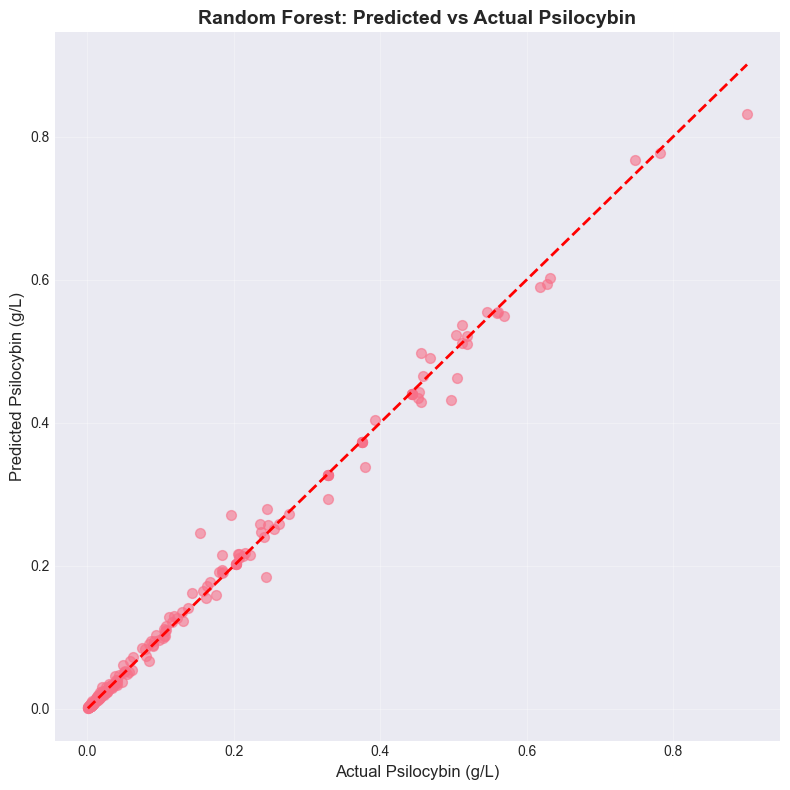


SECTION 3: GAUSSIAN PROCESS REGRESSION

F503_C1 - GP Model Score: 0.8882

F503_C2 - GP Model Score: 0.9840

F504_C1 - GP Model Score: 0.9738

F504_C2 - GP Model Score: 0.6355

F505_C1 - GP Model Score: -0.0003

F505_C2 - GP Model Score: 0.2688

F506_C1 - GP Model Score: 0.7451

F506_C2 - GP Model Score: 0.6446


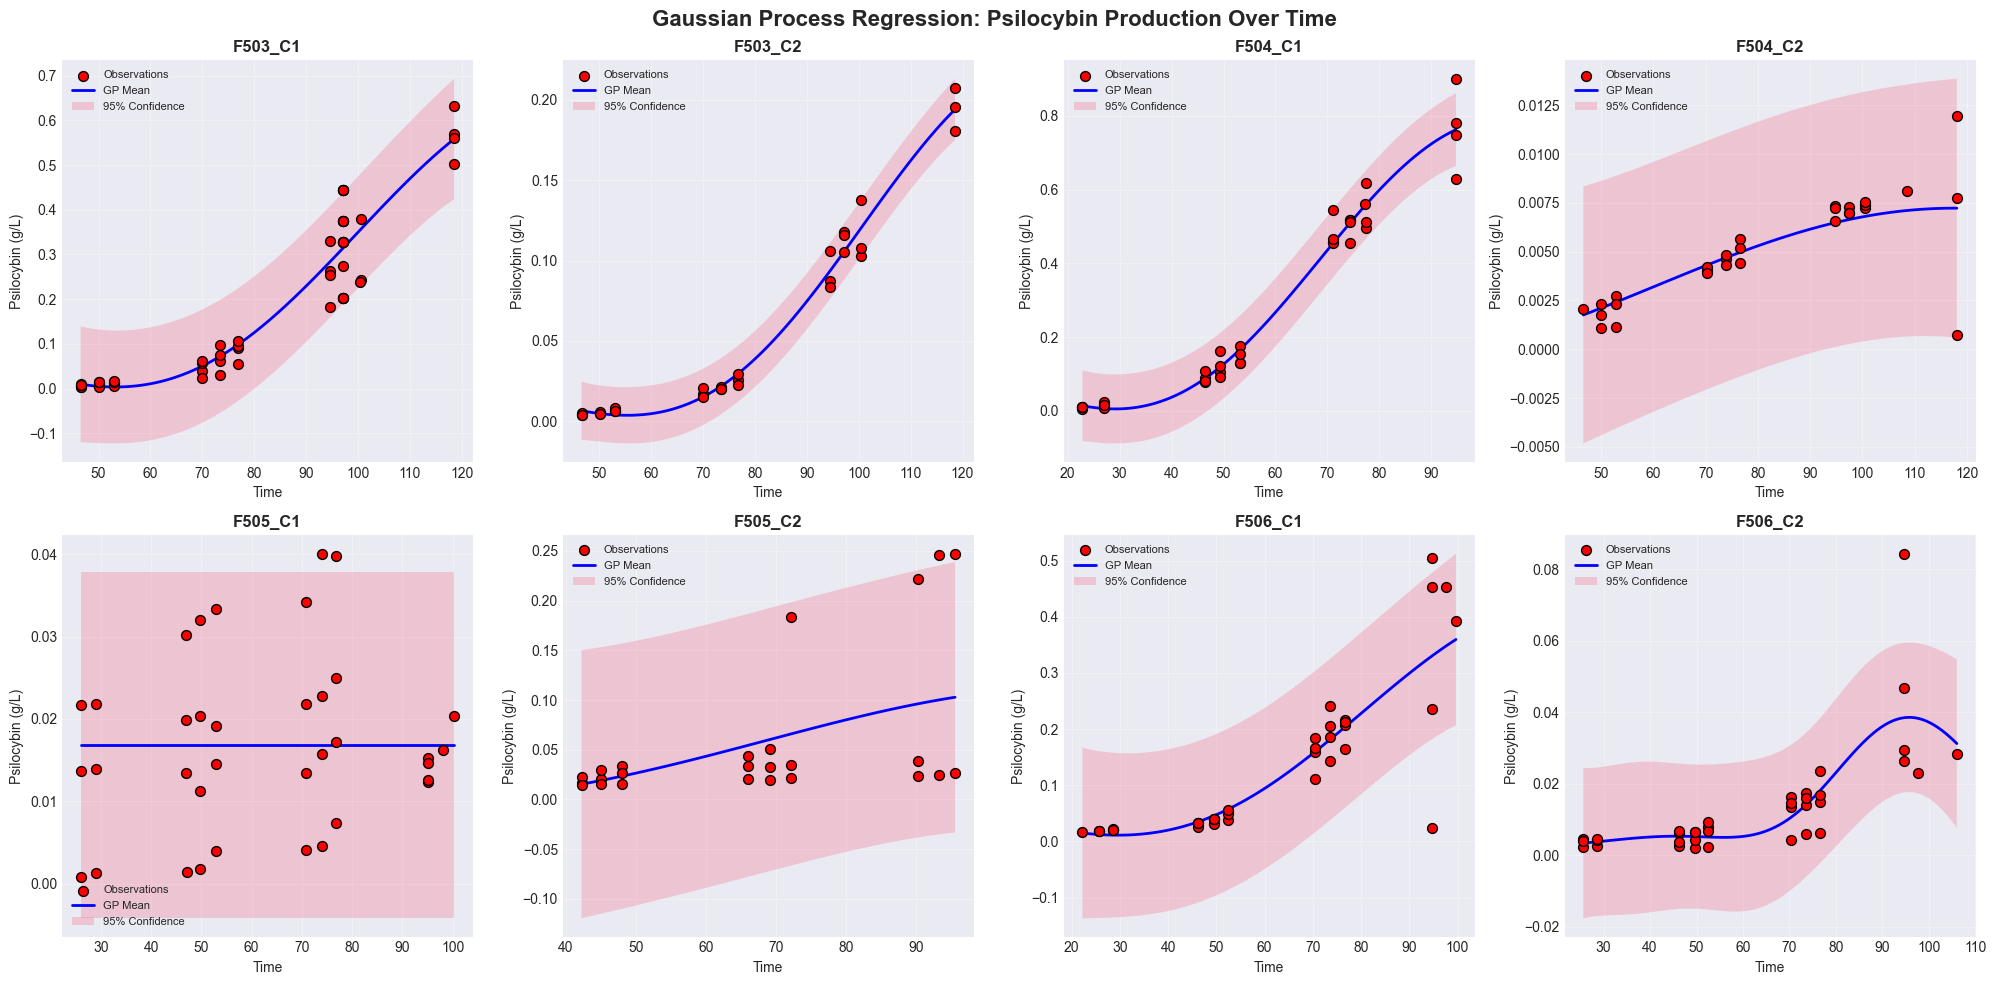


SECTION 4: PCA & CLUSTERING ANALYSIS

Explained Variance Ratio:
PC1: 0.6090 (60.90%)
PC2: 0.2896 (28.96%)
PC3: 0.0581 (5.81%)
PC4: 0.0320 (3.20%)
PC5: 0.0113 (1.13%)
Cumulative variance (first 3 PCs): 95.67%


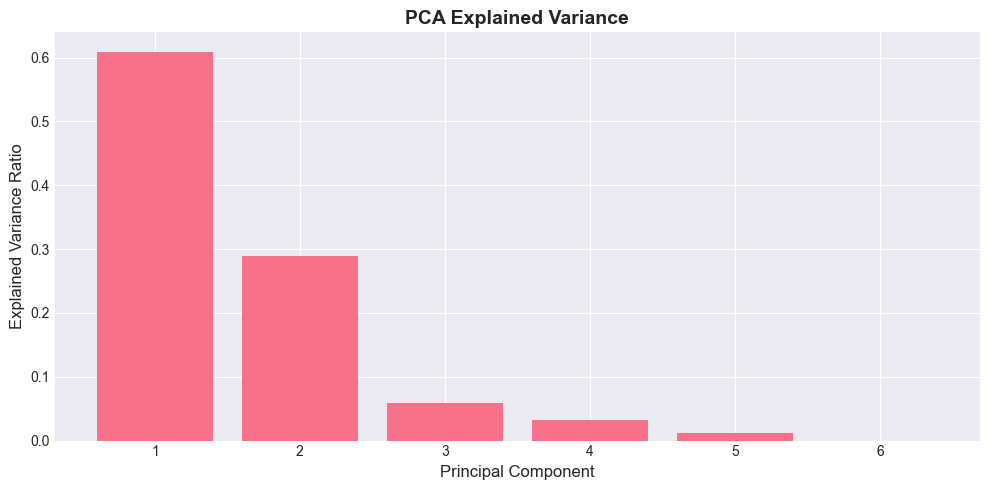

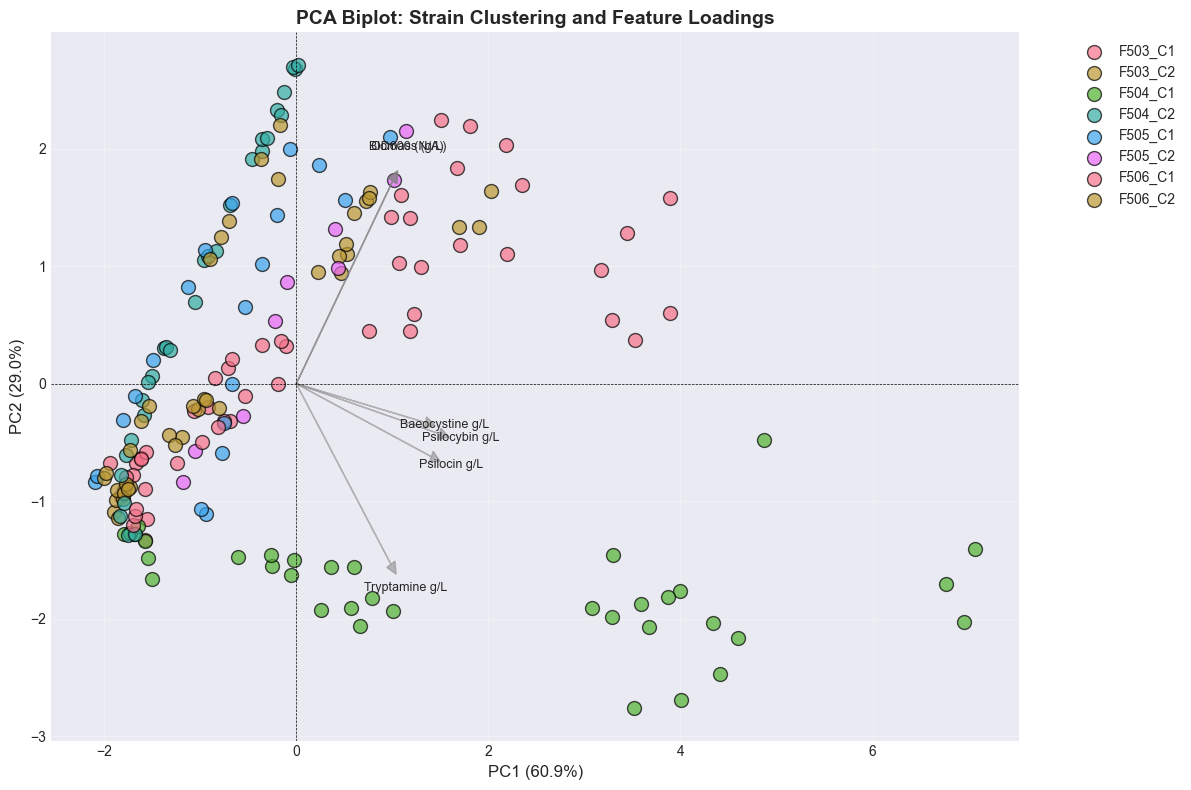


Feature Loadings on PC1 and PC2:
                   PC1    PC2
Biomass (g/L)    0.335  0.575
OD600 (N/A)      0.335  0.575
Psilocin g/L     0.469 -0.207
Psilocybin g/L   0.497 -0.142
Baeocystine g/L  0.448 -0.110
Tryptamine g/L   0.328 -0.512


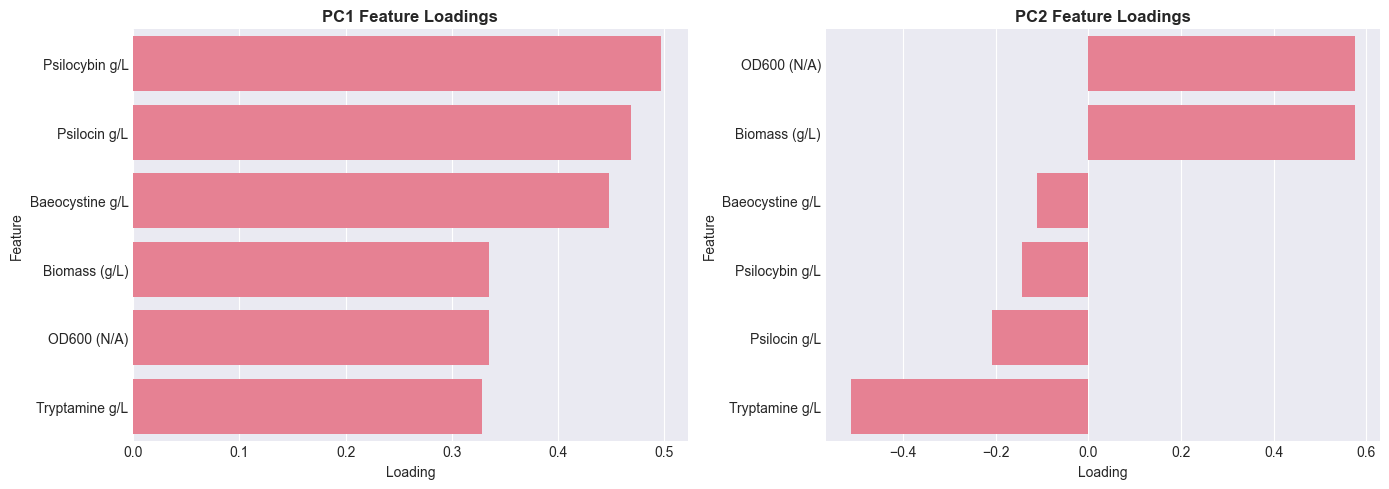


KEY INSIGHTS SUMMARY

1. STRAIN PERFORMANCE:
----------------------------------------
   • Best performing strain: F504_C1
   • Maximum psilocybin achieved: 0.901 g/L
   • Most consistent strain: F504_C2 (lowest variability)

2. METABOLITE PROXIES (Random Forest):
----------------------------------------
   Top 3 predictive metabolites:
   • Psilocin g/L: 0.8188
   • Baeocystine g/L: 0.1212
   • Time: 0.0272

   Model Performance: R² = 0.9942
   → These metabolites can serve as early indicators of psilocybin production

3. TIME-SERIES PATTERNS:
----------------------------------------
   • Gaussian Process models show production dynamics with uncertainty
   • Can be used for: trajectory prediction, optimization timing, anomaly detection

4. STRAIN CLUSTERING (PCA):
----------------------------------------
   • First 3 PCs explain 95.7% of variance
   • Strains cluster based on metabolic profiles
   • Key discriminating features:
     - Psilocybin g/L: 0.497
     - Psilocin g/L: 0.469


In [21]:
# Yarrowia Strain Machine Learning Analysis
# Psilocybin Production Analysis across Different Strains

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
df = pd.read_excel('../data/subs_omics_data/mltest.xlsx')
df = df.rename(columns={"Hours":"Time"})

print("Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# ============================================================================
# SECTION 1: DATA EXPLORATION & VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("SECTION 1: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Extract strain information (remove replicate info)
df['Strain'] = df['SampleID'].str.extract(r'(F\d+_C\d+)', flags=re.IGNORECASE)[0]
df['Replicate'] = df['SampleID'].str.extract(r'R(\d+)')[0].astype(float)

print("\nUnique Strains:", df['Strain'].unique())
print("Replicates per condition:", df.groupby('Strain')['Replicate'].nunique())

# 1.1 Psilocybin Production Over Time by Strain
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Psilocybin Production Over Time by Strain', fontsize=16, fontweight='bold')

strains = sorted(df['Strain'].unique(), key=lambda x: x.upper())
for idx, strain in enumerate(strains):
    ax = axes[idx // 4, idx % 4]
    strain_data = df[df['Strain'] == strain]
    
    for rep in strain_data['Replicate'].unique():
        rep_data = strain_data[strain_data['Replicate'] == rep]
        ax.plot(rep_data['Time'], rep_data['Psilocybin g/L'], 
                marker='o', label=f'R{int(rep)}', alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Psilocybin (g/L)', fontsize=10)
    ax.set_title(strain, fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('psilocybin_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.2 Summary Statistics by Strain
print("\nPsilocybin Production Summary by Strain:")
psilocybin_summary = df.groupby('Strain')['Psilocybin g/L'].agg([
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Max', 'max'),
    ('Min', 'min')
]).round(3)
print(psilocybin_summary.sort_values('Max', ascending=False))

# 1.3 Maximum Psilocybin by Strain
fig, ax = plt.subplots(figsize=(12, 6))
max_psilocybin = df.groupby('Strain')['Psilocybin g/L'].max().sort_values(ascending=False)
ax.bar(max_psilocybin.index, max_psilocybin.values, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Strain', fontsize=12)
ax.set_ylabel('Maximum Psilocybin (g/L)', fontsize=12)
ax.set_title('Maximum Psilocybin Production by Strain', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
# Add value labels on bars
for i, (strain, val) in enumerate(max_psilocybin.items()):
    ax.text(i, val + 0.02, f'{val:.3f}', ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('psilocybin_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.4 Heatmap of all metabolites
# Get numeric columns (excluding SampleID, Strain, Replicate)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Replicate' in numeric_cols:
    numeric_cols.remove('Replicate')

# For heatmap, only show metabolite concentrations (exclude Time, Biomass, OD600)
metabolite_cols = [col for col in numeric_cols if col not in ['Time', 'Biomass (g/L)', 'OD600 (N/A)']]

# Average by strain and time
heatmap_data = df.groupby(['Strain', 'Time'])[metabolite_cols].mean()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap='YlOrRd', annot=False, fmt='.2f', 
            cbar_kws={'label': 'Concentration'}, ax=ax)
ax.set_title('Metabolite Heatmap Across Strains and Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Strain - Time', fontsize=12)
ax.set_ylabel('Metabolites', fontsize=12)
plt.tight_layout()
plt.savefig('metabolite_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.5 Correlation Matrix
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix of All Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop correlations with Psilocybin:")
psilocybin_corr = correlation_matrix['Psilocybin g/L'].sort_values(ascending=False)
print(psilocybin_corr)

# ============================================================================
# SECTION 2: RANDOM FOREST FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 2: RANDOM FOREST FEATURE IMPORTANCE")
print("="*80)

# Prepare data for Random Forest
feature_cols = [col for col in numeric_cols if col != 'Psilocybin g/L']

# Drop rows with missing Psilocybin values (target)
missing_before = df['Psilocybin g/L'].isna().sum()
if missing_before > 0:
    print(f"⚠️ Dropping {missing_before} rows with missing Psilocybin g/L values.")
    df = df.dropna(subset=['Psilocybin g/L'])

# Fill missing values in features
X = df[feature_cols].fillna(df[feature_cols].mean())
y = df['Psilocybin g/L']


print(f"\nFeatures used: {feature_cols}")
print(f"Samples: {len(X)}")

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, 
                                  random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# Cross-validation score
cv_scores = cross_val_score(rf_model, X, y, cv=5, 
                            scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

print(f"\nRandom Forest Performance:")
print(f"Mean RMSE (5-fold CV): {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
print(f"R² Score on full data: {rf_model.score(X, y):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importance)

# Plot Feature Importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', ax=ax)
ax.set_title('Random Forest Feature Importance for Predicting Psilocybin', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Predicted vs Actual
y_pred = rf_model.predict(X)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y, y_pred, alpha=0.6, s=50)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Actual Psilocybin (g/L)', fontsize=12)
ax.set_ylabel('Predicted Psilocybin (g/L)', fontsize=12)
ax.set_title('Random Forest: Predicted vs Actual Psilocybin', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('rf_pred_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# SECTION 3: GAUSSIAN PROCESS REGRESSION FOR TIME SERIES
# ============================================================================

print("\n" + "="*80)
print("SECTION 3: GAUSSIAN PROCESS REGRESSION")
print("="*80)

# GP for each strain
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Gaussian Process Regression: Psilocybin Production Over Time', 
             fontsize=16, fontweight='bold')

for idx, strain in enumerate(strains):
    ax = axes[idx // 4, idx % 4]
    strain_data = df[df['Strain'] == strain].copy()
    
    # Prepare data
    X_train = strain_data[['Time']].values
    y_train = strain_data['Psilocybin g/L'].values
    
    # Create time points for prediction
    X_pred = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    
    # Define kernel
    kernel = ConstantKernel(1.0) * RBF(length_scale=10.0) + WhiteKernel(noise_level=0.1)
    
    # Train GP
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, 
                                   random_state=42)
    gp.fit(X_train, y_train)
    
    # Predict
    y_pred, sigma = gp.predict(X_pred, return_std=True)
    
    # Plot
    ax.scatter(X_train, y_train, c='red', s=50, zorder=10, 
               edgecolors='black', label='Observations')
    ax.plot(X_pred, y_pred, 'b-', lw=2, label='GP Mean')
    ax.fill_between(X_pred.ravel(), 
                    y_pred - 1.96 * sigma, 
                    y_pred + 1.96 * sigma,
                    alpha=0.3, label='95% Confidence')
    
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Psilocybin (g/L)', fontsize=10)
    ax.set_title(strain, fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    print(f"\n{strain} - GP Model Score: {gp.score(X_train, y_train):.4f}")

plt.tight_layout()
plt.savefig('gp_regression.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# SECTION 4: PCA & CLUSTERING ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 4: PCA & CLUSTERING ANALYSIS")
print("="*80)

# Clean up numeric_cols before PCA (avoid duplicating group keys)
numeric_cols = [col for col in numeric_cols if col not in ['Time', 'Strain']]

# Average replicates for cleaner PCA
pca_data = df.groupby(['Strain', 'Time'])[numeric_cols].mean().reset_index()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_data[numeric_cols])

# PCA
pca = PCA(n_components=min(len(numeric_cols), len(pca_data)))
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("\nExplained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_[:5]):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")
print(f"Cumulative variance (first 3 PCs): {pca.explained_variance_ratio_[:3].sum()*100:.2f}%")

# Plot explained variance
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, len(pca.explained_variance_ratio_)+1), 
       pca.explained_variance_ratio_)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Explained Variance Ratio', fontsize=12)
ax.set_title('PCA Explained Variance', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.tight_layout()
plt.savefig('pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# PCA Biplot (PC1 vs PC2)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot points colored by strain
for strain in pca_data['Strain'].unique():
    mask = pca_data['Strain'] == strain
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
              label=strain, s=100, alpha=0.7, edgecolors='black')

# Add feature vectors
loading_scale = 3
for i, feature in enumerate(numeric_cols):
    ax.arrow(0, 0, 
            pca.components_[0, i] * loading_scale,
            pca.components_[1, i] * loading_scale,
            head_width=0.1, head_length=0.1, fc='gray', ec='gray', alpha=0.5)
    ax.text(pca.components_[0, i] * loading_scale * 1.15,
           pca.components_[1, i] * loading_scale * 1.15,
           feature, fontsize=9, ha='center')

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax.set_title('PCA Biplot: Strain Clustering and Feature Loadings', 
            fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('pca_biplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=numeric_cols
)
print("\nFeature Loadings on PC1 and PC2:")
print(loadings.round(3))

# Plot loadings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, pc in enumerate(['PC1', 'PC2']):
    loadings_sorted = loadings[pc].sort_values(ascending=False)
    sns.barplot(x=loadings_sorted.values, y=loadings_sorted.index, ax=axes[idx])
    axes[idx].set_title(f'{pc} Feature Loadings', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Loading', fontsize=10)
    axes[idx].set_ylabel('Feature', fontsize=10)

plt.tight_layout()
plt.savefig('pca_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# SECTION 5: KEY INSIGHTS SUMMARY
# ============================================================================

print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

print("\n1. STRAIN PERFORMANCE:")
print("-" * 40)
best_strain = psilocybin_summary.idxmax()['Max']
print(f"   • Best performing strain: {best_strain}")
print(f"   • Maximum psilocybin achieved: {psilocybin_summary.loc[best_strain, 'Max']:.3f} g/L")
print(f"   • Most consistent strain: {psilocybin_summary['Std'].idxmin()} (lowest variability)")

print("\n2. METABOLITE PROXIES (Random Forest):")
print("-" * 40)
top_features = feature_importance.head(3)
print("   Top 3 predictive metabolites:")
for _, row in top_features.iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.4f}")
print(f"\n   Model Performance: R² = {rf_model.score(X, y):.4f}")
print("   → These metabolites can serve as early indicators of psilocybin production")

print("\n3. TIME-SERIES PATTERNS:")
print("-" * 40)
print("   • Gaussian Process models show production dynamics with uncertainty")
print("   • Can be used for: trajectory prediction, optimization timing, anomaly detection")

print("\n4. STRAIN CLUSTERING (PCA):")
print("-" * 40)
print(f"   • First 3 PCs explain {pca.explained_variance_ratio_[:3].sum()*100:.1f}% of variance")
print("   • Strains cluster based on metabolic profiles")
print("   • Key discriminating features:")
pc1_top = loadings['PC1'].abs().sort_values(ascending=False).head(2)
for feature, loading in pc1_top.items():
    print(f"     - {feature}: {loading:.3f}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE - All figures saved!")
print("="*80)
